In [40]:
!pip install -q girth --upgrade

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:

!pip install girth --upgrade

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


# Задание №1

Сравните разные методы оценки параметров. Для этого сгенерируйте данные согласно модели 2PL. На полученных данных сравните результаты действия методов совместного максимального правдоподобия (JML) и маргинального максимального правдоподобия (MML). Для этого посчитайте среднее смещение (bias) и квадратный корень из средней ошибки оценивания (RMSE) для оцениваемых параметров. Какой метод оценки параметров и в каких случаях более предпочтителен и почему?


In [3]:
from girth import twopl_mml
from girth import twopl_jml
from girth import grm_mml
from girth import ability_mle

from girth.synthetic import create_synthetic_irt_dichotomous
from girth.synthetic import create_synthetic_irt_polytomous

In [4]:
discrimination = np.random.rand(30) 
difficulty = np.linspace(-2.5, 2.5, 30)
theta = np.random.randn(500)

syn_data = create_synthetic_irt_dichotomous(difficulty, 
                                            discrimination, 
                                            theta)
syn_data

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])

In [5]:
estimates_mml = twopl_mml(syn_data)
estimates_mml

{'Discrimination': array([0.20000342, 0.71953766, 0.56544557, 0.57636732, 0.20000342,
        0.24000377, 0.52510519, 0.24240657, 0.66418503, 1.03213306,
        0.96251234, 0.21231324, 0.20000342, 0.76154111, 0.20000342,
        0.98659085, 0.65407929, 0.61876552, 0.69195581, 0.33806791,
        0.20000342, 0.96716157, 0.95467206, 0.33013048, 0.83063041,
        0.69518726, 0.20000342, 0.56327981, 0.33379782, 0.74984991]),
 'Difficulty': array([-0.93195899, -2.01668732, -1.19109294, -2.73413763, -1.01351038,
        -3.14541801, -1.9485804 , -0.26809593, -1.02364623, -0.94140314,
        -0.57584421, -0.8024219 , -0.28296613, -0.21391364, -0.16169611,
         0.06840226,  0.37745194,  0.26781279,  0.23105557,  0.88162356,
         0.97258006,  1.04286599,  1.13550591,  0.92721153,  1.65713296,
         1.72436281,  2.0895452 ,  2.2685094 ,  4.44647421,  1.96731624]),
 'Ability': array([-4.08637531e-01,  6.92701477e-01, -6.54176824e-01, -1.89878633e-01,
         5.09675290e-01,  3.156

In [6]:
'mean Ability MML: %s' % np.mean(estimates_mml['Ability'] - theta)

'mean Ability MML: -0.06852041701396351'

In [7]:
estimates_jml = twopl_jml(syn_data)
estimates_jml

{'Discrimination': array([0.25      , 0.88618302, 0.67387005, 0.69608382, 0.25      ,
        0.2921516 , 0.68940623, 0.25167747, 0.86511591, 1.54803786,
        1.44490313, 0.25      , 0.25      , 1.04320568, 0.25      ,
        1.54855644, 0.86146206, 0.74214038, 0.92973556, 0.39644116,
        0.25      , 1.43141045, 1.38398079, 0.39102508, 1.11476082,
        0.89199552, 0.25      , 0.68336386, 0.40279743, 0.9740903 ]),
 'Difficulty': array([-0.74918043, -1.69202861, -1.01781533, -2.31475333, -0.81472854,
        -2.5981855 , -1.5309207 , -0.25819808, -0.81687644, -0.70148865,
        -0.42410009, -0.68369619, -0.22736798, -0.16383827, -0.12986121,
         0.05250848,  0.29974226,  0.22896073,  0.18182031,  0.75813936,
         0.78204884,  0.78229953,  0.86182476,  0.78942025,  1.31198463,
         1.39811022,  1.67991913,  1.91090225,  3.71837309,  1.58643309])}

In [8]:
abil_jml = ability_mle(syn_data, 
                       estimates_jml['Difficulty'], 
                       estimates_jml['Discrimination'])

'mean Ability JML: %s' % np.mean(abil_jml - theta)

'mean Ability JML: -0.06842715613856304'

In [9]:
rmse = lambda x, y: np.sqrt(np.mean((x - y) ** 2))
bias = lambda x, y: np.average(y - x)

In [10]:
print("RMSE Ability JML: ", rmse(abil_jml, theta))
print("RMSE Ability MML: ", rmse(estimates_mml['Ability'], theta))

RMSE Ability JML:  0.6547236811584517
RMSE Ability MML:  0.6110451953126507


In [11]:
print("BIAS Ability JML: ", bias(abil_jml, theta))
print("BIAS Ability MML: ", bias(estimates_mml['Ability'], theta))

BIAS Ability JML:  0.06842715613856304
BIAS Ability MML:  0.06852041701396351


## Вывод: 
1. MML лучше, чем JML 
2. JML хуже в случае заданий с чрезвычайной сложностью или параметрами дискриминации при маленькой выборке

# Задание №2

Проведите исследование одной из политомических моделей - GRM или GPCM. Для фиксированных (но допустимых) значений параметров заданий найдите информацию Фишера для уровня подготовленности. В качестве метода оценивания рекомендуется использовать MML.

In [19]:
diffi = np.sort(np.random.rand(30, 10), axis=1)
discr = np.random.rand(30)
inffi = []
theta = np.linspace(-6, 6, 30)

for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    estimates = grm_mml(data)
    
    inffi.append(
        1 / (rmse(estimates['Ability'], theta) ** 2)
    )


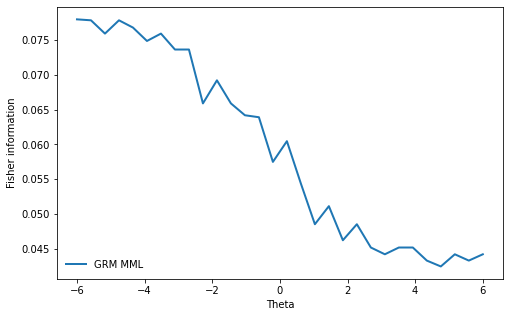

In [43]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

# Задание №3
Проведите исследование, как меняется информация Фишера при бинаризации ответов для выбранной в п.2 политомической модели. При бинаризации ответов считайте максимально возможное значение верным, остальные - неверными. После этого проведите анализ данных с помощью дихотомической модели: рекомендуется для этих целей использовать модель 2PL. Сравните информацию Фишера для уровня подготовленности для политомической модели из п.2 и для дихотомической модели после бинаризации ответов.

In [23]:
inffi_bin = []
for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    
    maxval = max(data[0])
    
    # Поляризация данных
    data[0] = np.array(list(map(lambda x: int(x == maxval), data[0])))

    estimates = grm_mml(data)       
    
    inffi_bin.append(
        1 / (rmse(estimates['Ability'], theta) ** 2)
    )

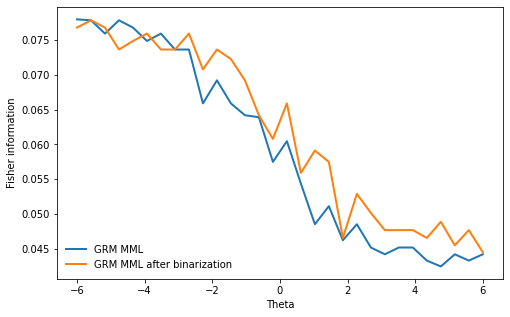

In [47]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin, linewidth=2.0, label='GRM MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

In [31]:
inffi_bin_d = []

for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    
    maxval = max(data[0])
    
    # Поляризация данных
    data[0] = np.array(list(map(lambda x: int(x == maxval), data[0])))

    estimates = twopl_mml(data)
        
    inffi_bin_d.append(
        1 / (rmse(estimates['Ability'], theta) ** 2)
    )

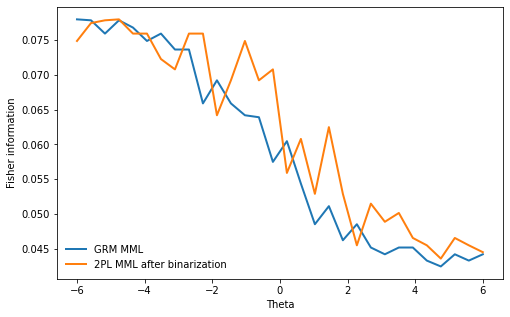

In [45]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin_d, linewidth=2.0, label='2PL MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

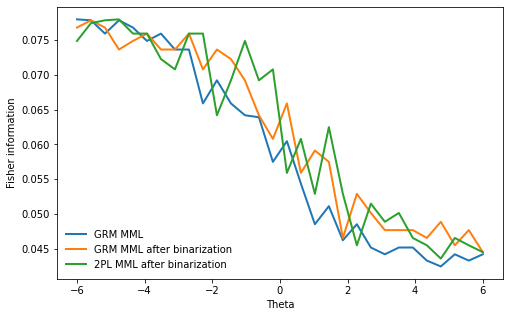

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin, linewidth=2.0, label='GRM MML after binarization')
ax.plot(theta, inffi_bin_d, linewidth=2.0, label='2PL MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)

plt.show()